K-MEANS CLUSTERING TO CATEGORIZE CUSTOMERS

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


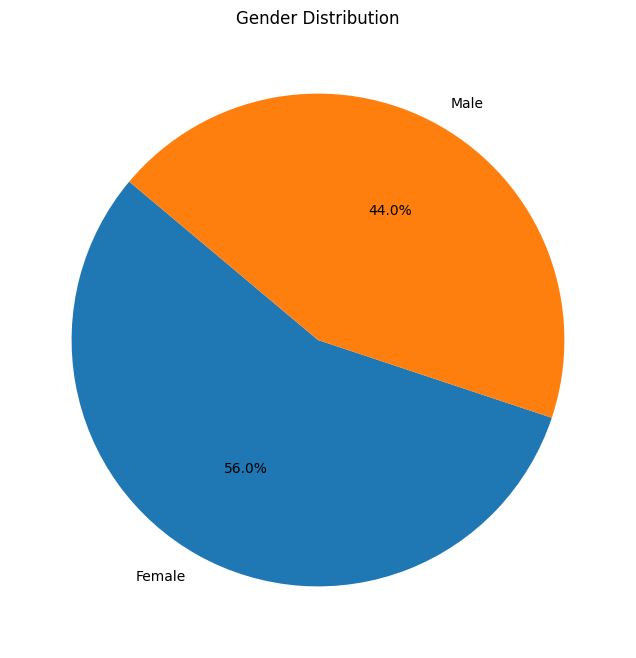

In [3]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


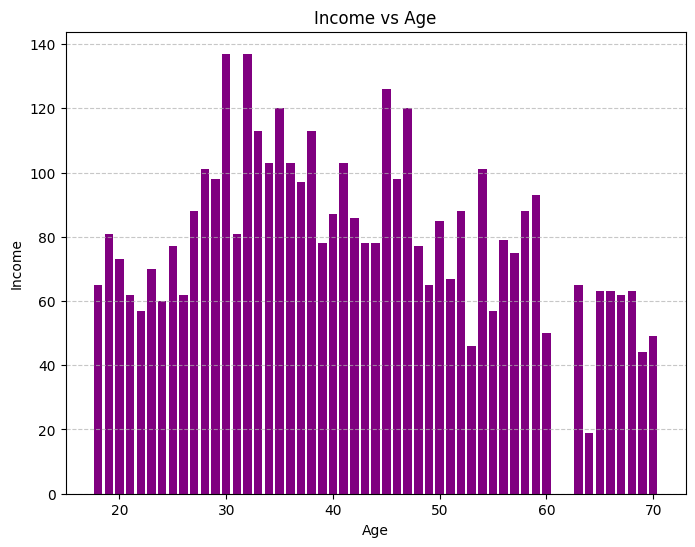

In [4]:
plt.figure(figsize=(8, 6))
plt.bar(df['Age'],df['Annual Income (k$)'], color='purple')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
X = df.iloc[:, [3, 4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

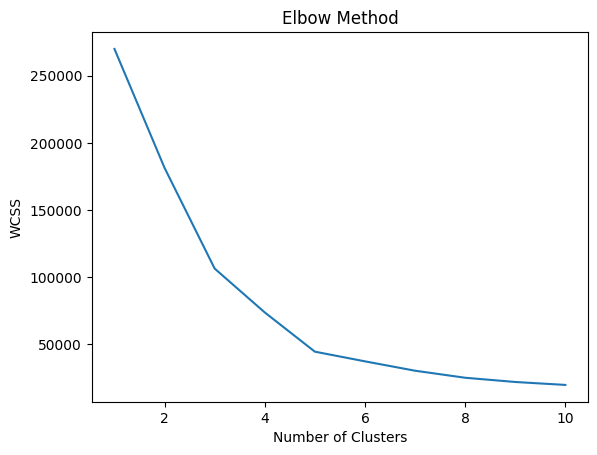

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph, K=5

In [60]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head(2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3


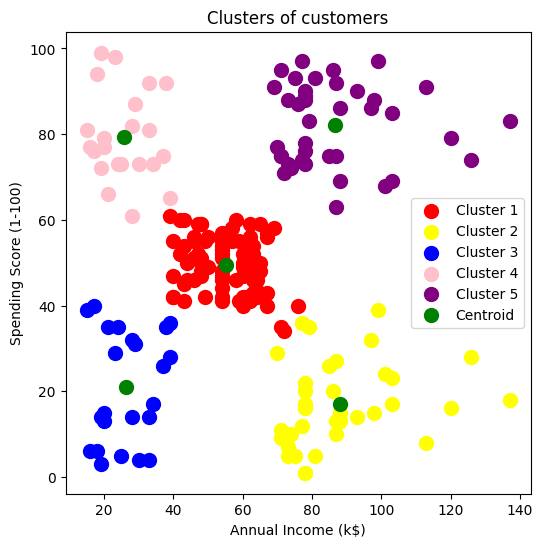

In [61]:
plt.figure(figsize=(6, 6))

plt.scatter(X[df['Cluster'] == 0, 0], X[df['Cluster'] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[df['Cluster'] == 1, 0], X[df['Cluster'] == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[df['Cluster']== 2, 0], X[df['Cluster'] == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[df['Cluster'] == 3, 0], X[df['Cluster'] == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[df['Cluster'] == 4, 0], X[df['Cluster'] == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


CLUSTER 1 - average salary and average spending - Moderate Spenders

CLUSTER 2 - high income but low spending - Savers

CLUSTER 3 - low income and also low spending - Budget Conscious

CLUSTER 4 - low income with very high spending - High-Spenders (Careless)

CLUSTER 5 - high income and high spending - Luxury Customers (profitable/targets)